In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.ensemble import RandomForestRegressor

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
from sklearn.metrics import r2_score,mean_squared_error

In [9]:
train_df=pd.read_csv('train_F3fUq2S.csv')


In [10]:
train_df.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


In [11]:
train_df.tail()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
1883,1884,3,88,1451,75,2,0,Noon,2,11,...,0,0,1,0,0,0,0,0,10,0.350746
1884,1885,3,58,10537,40,2,0,Evening,2,11,...,0,0,0,0,0,0,0,0,11,0.004728
1885,1886,3,89,11050,26,1,0,Evening,15,9,...,0,0,0,0,0,0,0,0,6,0.008289
1886,1887,3,58,10537,40,1,0,Evening,2,11,...,0,0,0,0,0,0,0,0,16,0.012014
1887,1888,3,89,11050,26,0,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.003644


In [12]:
train_df.shape

(1888, 22)

In [13]:
train_df.dtypes

campaign_id             int64
sender                  int64
subject_len             int64
body_len                int64
mean_paragraph_len      int64
day_of_week             int64
is_weekend              int64
times_of_day           object
category                int64
product                 int64
no_of_CTA               int64
mean_CTA_len            int64
is_image                int64
is_personalised         int64
is_quote                int64
is_timer                int64
is_emoticons            int64
is_discount             int64
is_price                int64
is_urgency              int64
target_audience         int64
click_rate            float64
dtype: object

In [14]:
train_df.isnull().sum()/len(train_df)

campaign_id           0.0
sender                0.0
subject_len           0.0
body_len              0.0
mean_paragraph_len    0.0
day_of_week           0.0
is_weekend            0.0
times_of_day          0.0
category              0.0
product               0.0
no_of_CTA             0.0
mean_CTA_len          0.0
is_image              0.0
is_personalised       0.0
is_quote              0.0
is_timer              0.0
is_emoticons          0.0
is_discount           0.0
is_price              0.0
is_urgency            0.0
target_audience       0.0
click_rate            0.0
dtype: float64

In [15]:
train_df.describe()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,...,1888.000000,1888.000000,1888.000000,1888.0,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,944.500000,4.395657,86.246292,14185.780191,35.239407,2.828390,0.199682,9.949682,17.525424,4.222458,...,0.909958,0.056674,0.834216,0.0,0.210805,0.039725,40.197034,0.112288,11.634534,0.041888
std,545.162973,3.277927,30.143206,7327.615307,28.139498,1.763193,0.399867,5.300719,12.369526,4.628348,...,0.866467,0.231279,1.033901,0.0,0.613442,0.195363,553.957470,0.315804,2.949121,0.084223
min,1.000000,0.000000,9.000000,23.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,472.750000,3.000000,69.000000,9554.500000,21.000000,1.000000,0.000000,6.000000,9.000000,2.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.005413
50%,944.500000,3.000000,83.000000,12689.000000,29.000000,3.000000,0.000000,10.000000,12.000000,3.000000,...,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.010686
75%,1416.250000,3.000000,98.000000,17351.500000,40.000000,4.000000,0.000000,15.000000,27.250000,5.000000,...,2.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.035589
max,1888.000000,15.000000,265.000000,44491.000000,286.000000,6.000000,1.000000,15.000000,43.000000,49.000000,...,6.000000,1.000000,6.000000,0.0,6.000000,1.000000,14999.000000,1.000000,16.000000,0.897959


In [16]:
train_df.columns

Index(['campaign_id', 'sender', 'subject_len', 'body_len',
       'mean_paragraph_len', 'day_of_week', 'is_weekend', 'times_of_day',
       'category', 'product', 'no_of_CTA', 'mean_CTA_len', 'is_image',
       'is_personalised', 'is_quote', 'is_timer', 'is_emoticons',
       'is_discount', 'is_price', 'is_urgency', 'target_audience',
       'click_rate'],
      dtype='object')

In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campaign_id         1888 non-null   int64  
 1   sender              1888 non-null   int64  
 2   subject_len         1888 non-null   int64  
 3   body_len            1888 non-null   int64  
 4   mean_paragraph_len  1888 non-null   int64  
 5   day_of_week         1888 non-null   int64  
 6   is_weekend          1888 non-null   int64  
 7   times_of_day        1888 non-null   object 
 8   category            1888 non-null   int64  
 9   product             1888 non-null   int64  
 10  no_of_CTA           1888 non-null   int64  
 11  mean_CTA_len        1888 non-null   int64  
 12  is_image            1888 non-null   int64  
 13  is_personalised     1888 non-null   int64  
 14  is_quote            1888 non-null   int64  
 15  is_timer            1888 non-null   int64  
 16  is_emo

In [18]:
train_df.drop_duplicates(inplace=True)

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='click_rate', ylabel='Density'>

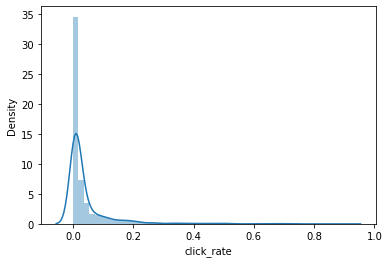

In [19]:
sns.distplot(train_df['click_rate'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='subject_len'>

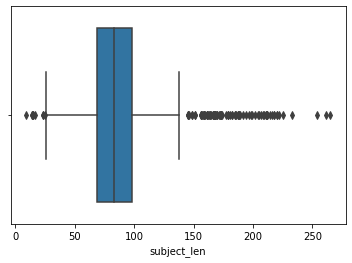

In [20]:
sns.boxplot(train_df['subject_len'])

In [21]:
q1=train_df['subject_len'].quantile(0.25)

In [22]:
q3=train_df['subject_len'].quantile(0.75)

In [23]:
IQR=q3-q1

In [24]:
lower=q1-1.5*IQR

In [25]:
upper=q1+1.5*IQR

In [26]:
train_df=train_df[(train_df['subject_len']>lower) & (train_df['subject_len']<upper)]

In [27]:
train_df

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,1884,3,88,1451,75,2,0,Noon,2,11,...,0,0,1,0,0,0,0,0,10,0.350746
1884,1885,3,58,10537,40,2,0,Evening,2,11,...,0,0,0,0,0,0,0,0,11,0.004728
1885,1886,3,89,11050,26,1,0,Evening,15,9,...,0,0,0,0,0,0,0,0,6,0.008289
1886,1887,3,58,10537,40,1,0,Evening,2,11,...,0,0,0,0,0,0,0,0,16,0.012014


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='body_len'>

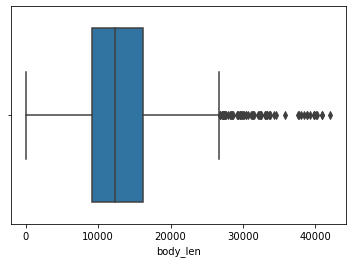

In [28]:
sns.boxplot(train_df['body_len'])

In [29]:
q1=train_df['body_len'].quantile(0.25)

In [30]:
q3=train_df['body_len'].quantile(0.75)

In [31]:
IQR=q3-q1

In [32]:
lower=q1-1.5*IQR

In [33]:
upper=q1+1.5*IQR

In [34]:
train_df=train_df[(train_df['body_len']>lower) & (train_df['body_len']<upper)]

In [35]:
train_df

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,1884,3,88,1451,75,2,0,Noon,2,11,...,0,0,1,0,0,0,0,0,10,0.350746
1884,1885,3,58,10537,40,2,0,Evening,2,11,...,0,0,0,0,0,0,0,0,11,0.004728
1885,1886,3,89,11050,26,1,0,Evening,15,9,...,0,0,0,0,0,0,0,0,6,0.008289
1886,1887,3,58,10537,40,1,0,Evening,2,11,...,0,0,0,0,0,0,0,0,16,0.012014


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mean_paragraph_len'>

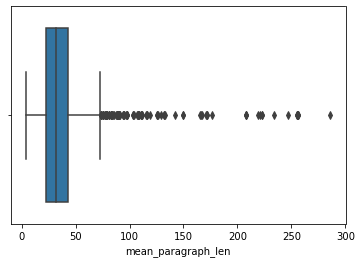

In [36]:
sns.boxplot(train_df['mean_paragraph_len'])

In [37]:
q1=train_df['mean_paragraph_len'].quantile(0.25)

In [38]:
q3=train_df['mean_paragraph_len'].quantile(0.75)

In [39]:
IQR=q3-q1

In [40]:
lower=q1-1.5*IQR

In [41]:
upper=q1+1.5*IQR

In [42]:
train_df=train_df[(train_df['mean_paragraph_len']>lower) & (train_df['mean_paragraph_len']<upper)]

In [43]:
train_df

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826
7,8,3,60,12117,17,4,0,Noon,6,26,...,1,0,1,0,0,0,0,0,14,0.166998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1882,1883,3,74,10535,40,3,0,Evening,2,11,...,0,0,0,0,0,0,0,0,15,0.002748
1884,1885,3,58,10537,40,2,0,Evening,2,11,...,0,0,0,0,0,0,0,0,11,0.004728
1885,1886,3,89,11050,26,1,0,Evening,15,9,...,0,0,0,0,0,0,0,0,6,0.008289
1886,1887,3,58,10537,40,1,0,Evening,2,11,...,0,0,0,0,0,0,0,0,16,0.012014


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='no_of_CTA'>

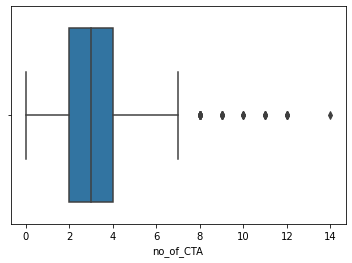

In [44]:
sns.boxplot(train_df['no_of_CTA'])

In [45]:
q1=train_df['no_of_CTA'].quantile(0.25)

In [46]:
q3=train_df['no_of_CTA'].quantile(0.75)

In [47]:
IQR=q3-q1

In [48]:
lower=q1-1.5*IQR

In [49]:
upper=q1+1.5*IQR

In [50]:
train_df=train_df[(train_df['no_of_CTA']>lower) & (train_df['no_of_CTA']<upper)]

In [51]:
train_df

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826
7,8,3,60,12117,17,4,0,Noon,6,26,...,1,0,1,0,0,0,0,0,14,0.166998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1874,1875,3,74,10596,31,5,1,Noon,2,11,...,2,0,1,0,0,0,0,0,16,0.006033
1876,1877,3,100,9132,19,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,15,0.006598
1879,1880,3,74,10601,31,4,0,Evening,2,11,...,2,0,1,0,0,0,0,0,16,0.004249
1885,1886,3,89,11050,26,1,0,Evening,15,9,...,0,0,0,0,0,0,0,0,6,0.008289


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mean_CTA_len'>

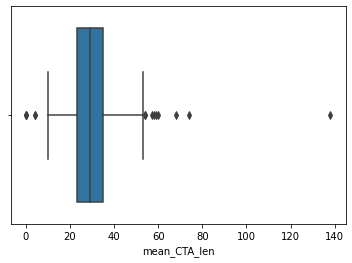

In [52]:
sns.boxplot(train_df['mean_CTA_len'])

In [53]:
q1=train_df['mean_CTA_len'].quantile(0.25)

In [54]:
q3=train_df['mean_CTA_len'].quantile(0.75)

In [55]:
IQR=q3-q1

In [56]:
lower=q1-1.5*IQR

In [57]:
upper=q1+1.5*IQR

In [58]:
train_df=train_df[(train_df['mean_CTA_len']>lower) & (train_df['mean_CTA_len']<upper)]

In [59]:
train_df

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826
7,8,3,60,12117,17,4,0,Noon,6,26,...,1,0,1,0,0,0,0,0,14,0.166998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1874,1875,3,74,10596,31,5,1,Noon,2,11,...,2,0,1,0,0,0,0,0,16,0.006033
1876,1877,3,100,9132,19,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,15,0.006598
1879,1880,3,74,10601,31,4,0,Evening,2,11,...,2,0,1,0,0,0,0,0,16,0.004249
1885,1886,3,89,11050,26,1,0,Evening,15,9,...,0,0,0,0,0,0,0,0,6,0.008289


In [60]:
x=train_df.groupby('category')['click_rate'].mean().index


In [61]:
y=train_df.groupby('category')['click_rate'].mean().values


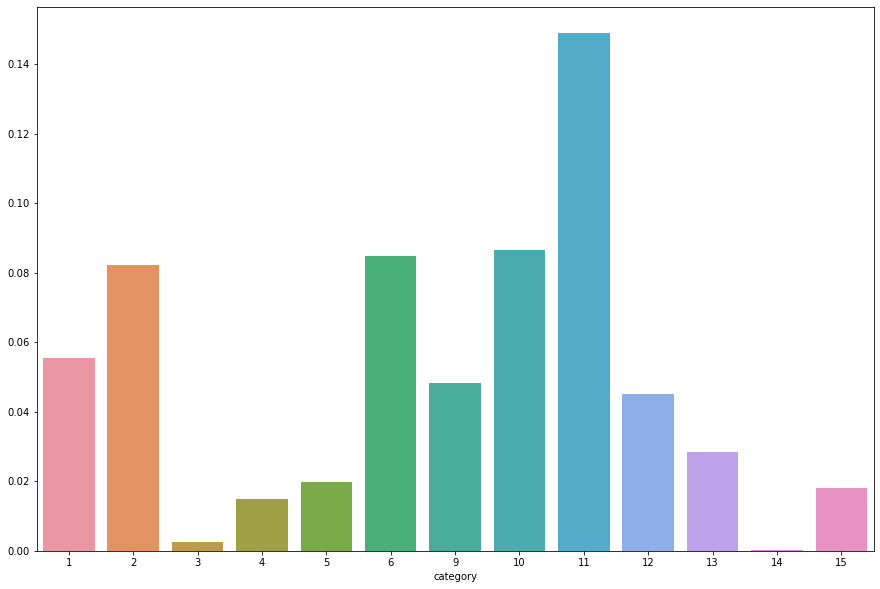

In [62]:
plt.figure(figsize=(15,10))
sns.barplot(x=x,y=y)
plt.show()

In [63]:
x=train_df.groupby('product')['click_rate'].mean().sort_values(ascending=False).index


In [64]:
y=train_df.groupby('product')['click_rate'].mean().sort_values(ascending=False).values


In [65]:
x

Int64Index([29, 22, 26, 38, 25, 14, 42, 37, 11, 23,  5,  8, 34, 21, 20, 12, 10,
            17, 24,  1, 28, 18, 41,  9, 16, 31,  6,  7, 13, 19, 39, 36,  3, 43,
            40, 33],
           dtype='int64', name='product')

In [66]:
y

array([0.17043356, 0.1487689 , 0.1341013 , 0.11560127, 0.11226939,
       0.09738314, 0.08642617, 0.08421833, 0.08222805, 0.06269838,
       0.05533629, 0.05375494, 0.04886009, 0.02836304, 0.02752965,
       0.0273715 , 0.0261816 , 0.01975826, 0.01924489, 0.01853168,
       0.01775077, 0.01747487, 0.0163102 , 0.01524682, 0.01494563,
       0.01419751, 0.01373236, 0.01330869, 0.01320704, 0.0129485 ,
       0.01010945, 0.01007651, 0.0061459 , 0.00259961, 0.00146628,
       0.00036236])

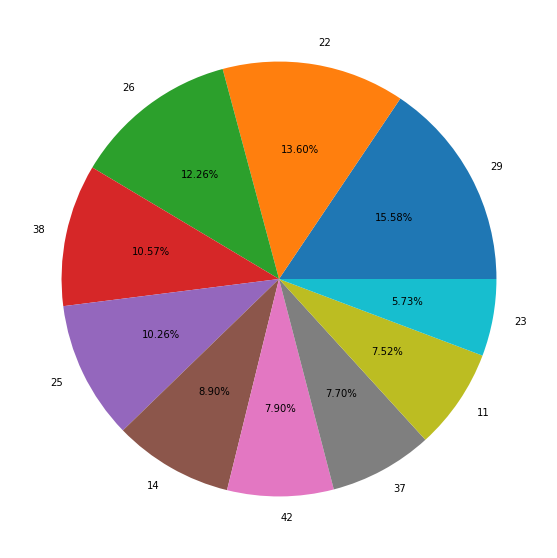

In [67]:
plt.figure(figsize=(10,10))
plt.pie(x=y[:10],labels=x[:10],autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='is_weekend', ylabel='click_rate'>

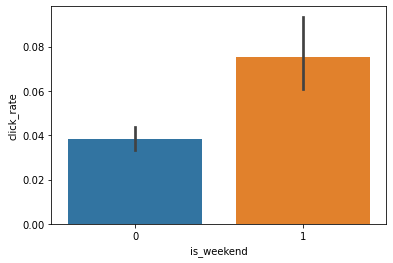

In [68]:
sns.barplot(x=train_df['is_weekend'],y=train_df['click_rate'])

<AxesSubplot:xlabel='day_of_week', ylabel='click_rate'>

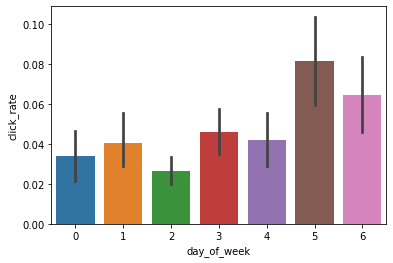

In [69]:
sns.barplot(x=train_df['day_of_week'],y=train_df['click_rate'])

<AxesSubplot:xlabel='times_of_day', ylabel='click_rate'>

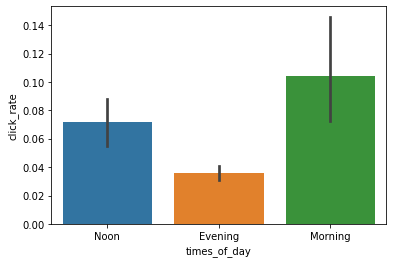

In [70]:
sns.barplot(x=train_df['times_of_day'],y=train_df['click_rate'])

<AxesSubplot:xlabel='is_image', ylabel='click_rate'>

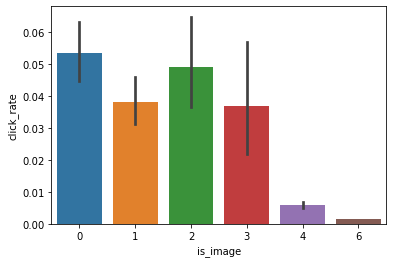

In [71]:
sns.barplot(x=train_df['is_image'],y=train_df['click_rate'])

<AxesSubplot:xlabel='is_quote', ylabel='click_rate'>

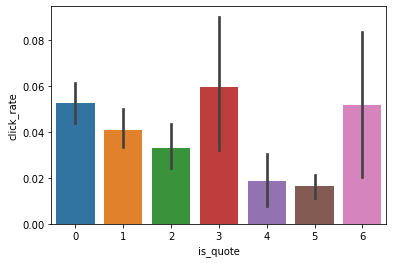

In [72]:
sns.barplot(x=train_df['is_quote'],y=train_df['click_rate'])

<AxesSubplot:xlabel='is_emoticons', ylabel='click_rate'>

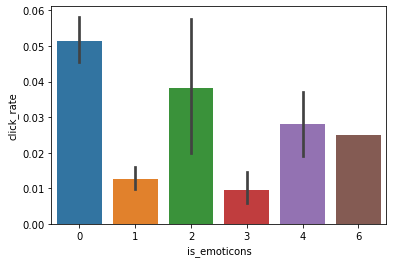

In [73]:
sns.barplot(x=train_df['is_emoticons'],y=train_df['click_rate'])

<AxesSubplot:xlabel='target_audience', ylabel='click_rate'>

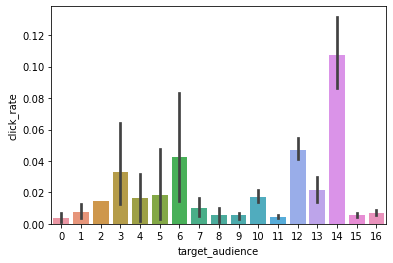

In [74]:
sns.barplot(x=train_df['target_audience'],y=train_df['click_rate'])

<AxesSubplot:xlabel='is_urgency', ylabel='click_rate'>

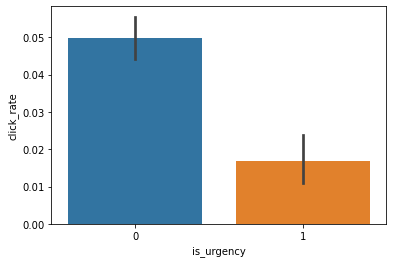

In [75]:
sns.barplot(x=train_df['is_urgency'],y=train_df['click_rate'])

<AxesSubplot:xlabel='is_price', ylabel='click_rate'>

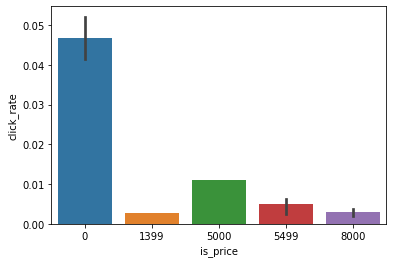

In [76]:
sns.barplot(x=train_df['is_price'],y=train_df['click_rate'])

<AxesSubplot:xlabel='sender', ylabel='click_rate'>

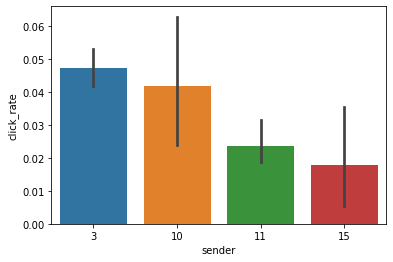

In [77]:
sns.barplot(x=train_df['sender'],y=train_df['click_rate'])

<AxesSubplot:xlabel='no_of_CTA', ylabel='click_rate'>

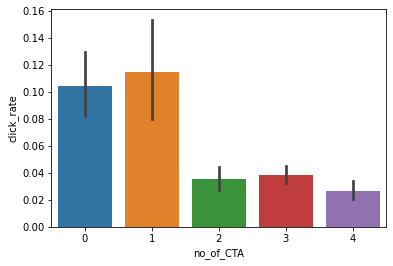

In [78]:
sns.barplot(x=train_df['no_of_CTA'],y=train_df['click_rate'])

<AxesSubplot:xlabel='product', ylabel='click_rate'>

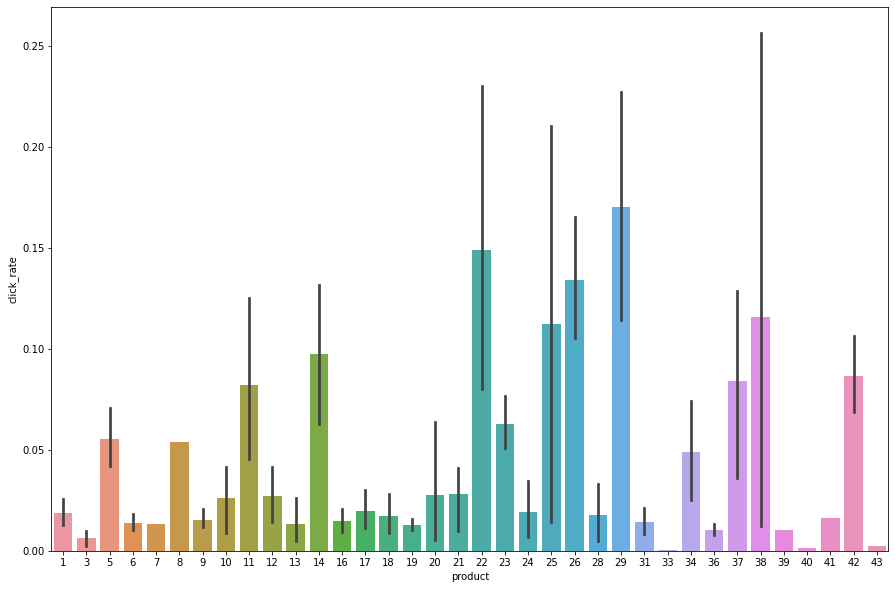

In [79]:
plt.figure(figsize=(15,10))
sns.barplot(x=train_df['product'],y=train_df['click_rate'])

<AxesSubplot:xlabel='category', ylabel='click_rate'>

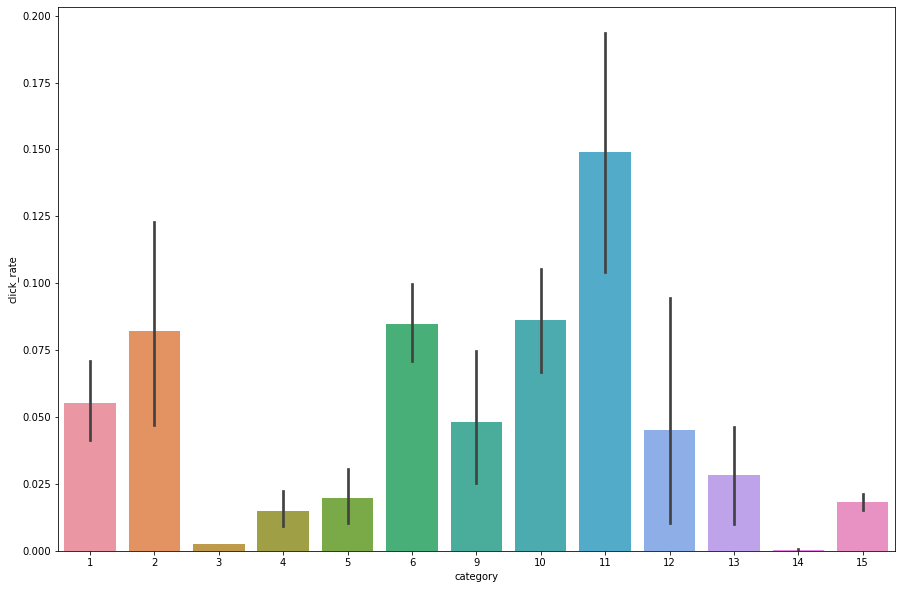

In [80]:
plt.figure(figsize=(15,10))
sns.barplot(x=train_df['category'],y=train_df['click_rate'])

In [81]:
train_df

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826
7,8,3,60,12117,17,4,0,Noon,6,26,...,1,0,1,0,0,0,0,0,14,0.166998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1874,1875,3,74,10596,31,5,1,Noon,2,11,...,2,0,1,0,0,0,0,0,16,0.006033
1876,1877,3,100,9132,19,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,15,0.006598
1879,1880,3,74,10601,31,4,0,Evening,2,11,...,2,0,1,0,0,0,0,0,16,0.004249
1885,1886,3,89,11050,26,1,0,Evening,15,9,...,0,0,0,0,0,0,0,0,6,0.008289


In [82]:
train_df['click_rate_range']=pd.qcut(train_df['click_rate'],5)


C:\Users\himanshu\AppData\Local\Temp\ipykernel_27852\1108324852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['click_rate_range']=pd.qcut(train_df['click_rate'],5)


In [83]:
train_df

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate,click_rate_range
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,14,0.103079,"(0.0634, 0.693]"
2,3,3,59,12801,16,5,1,Noon,2,11,...,0,1,0,0,0,0,0,16,0.002769,"(-0.001, 0.00509]"
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,10,0.010868,"(0.00912, 0.0198]"
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,1,0,0,0,0,0,14,0.142826,"(0.0634, 0.693]"
7,8,3,60,12117,17,4,0,Noon,6,26,...,0,1,0,0,0,0,0,14,0.166998,"(0.0634, 0.693]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1874,1875,3,74,10596,31,5,1,Noon,2,11,...,0,1,0,0,0,0,0,16,0.006033,"(0.00509, 0.00912]"
1876,1877,3,100,9132,19,4,0,Evening,15,9,...,0,0,0,0,0,0,0,15,0.006598,"(0.00509, 0.00912]"
1879,1880,3,74,10601,31,4,0,Evening,2,11,...,0,1,0,0,0,0,0,16,0.004249,"(-0.001, 0.00509]"
1885,1886,3,89,11050,26,1,0,Evening,15,9,...,0,0,0,0,0,0,0,6,0.008289,"(0.00509, 0.00912]"


<AxesSubplot:xlabel='click_rate_range', ylabel='count'>

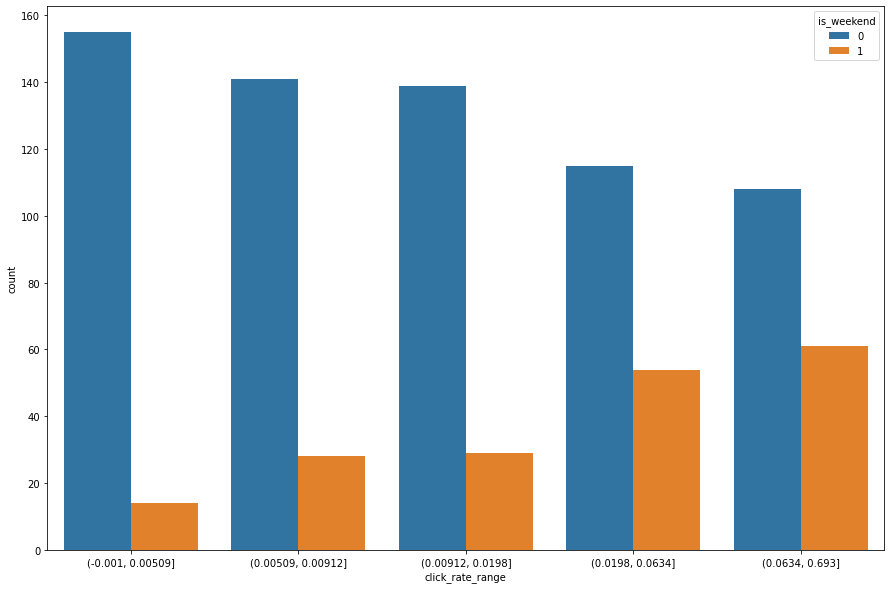

In [84]:
plt.figure(figsize=(15,10))
sns.countplot(x=train_df['click_rate_range'],hue=train_df['is_weekend'])

<AxesSubplot:xlabel='click_rate_range', ylabel='count'>

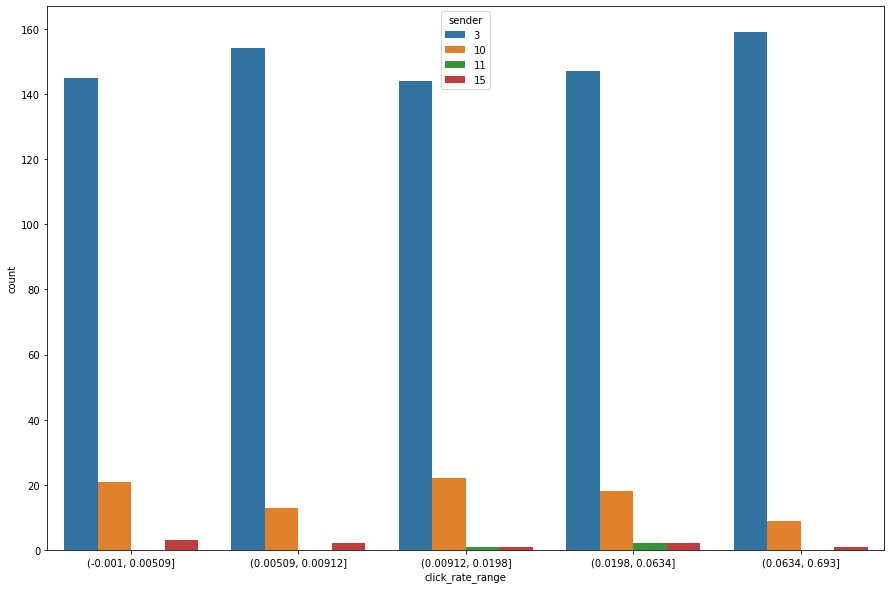

In [85]:
plt.figure(figsize=(15,10))
sns.countplot(x=train_df['click_rate_range'],hue=train_df['sender'])

<AxesSubplot:xlabel='click_rate_range', ylabel='count'>

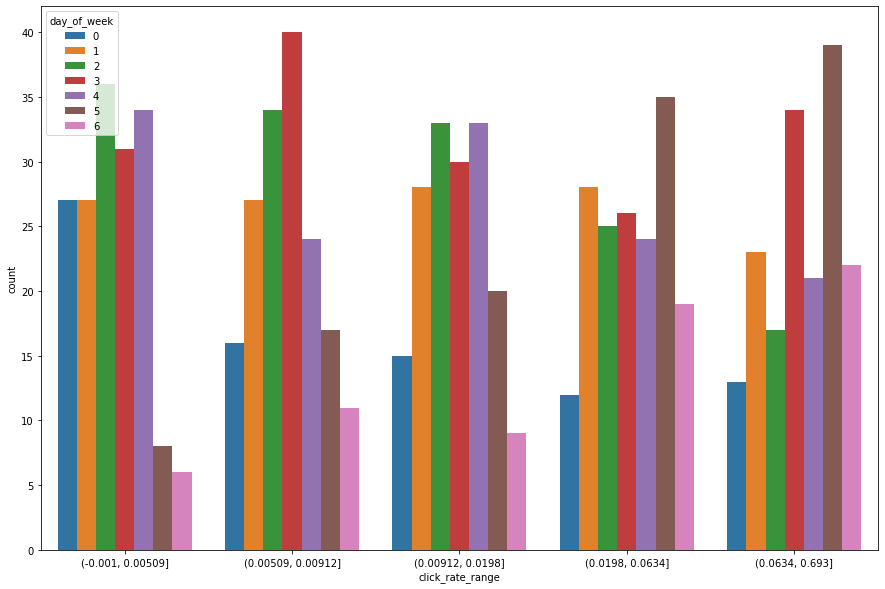

In [86]:
plt.figure(figsize=(15,10))
sns.countplot(x=train_df['click_rate_range'],hue=train_df['day_of_week'])

<AxesSubplot:xlabel='click_rate_range', ylabel='count'>

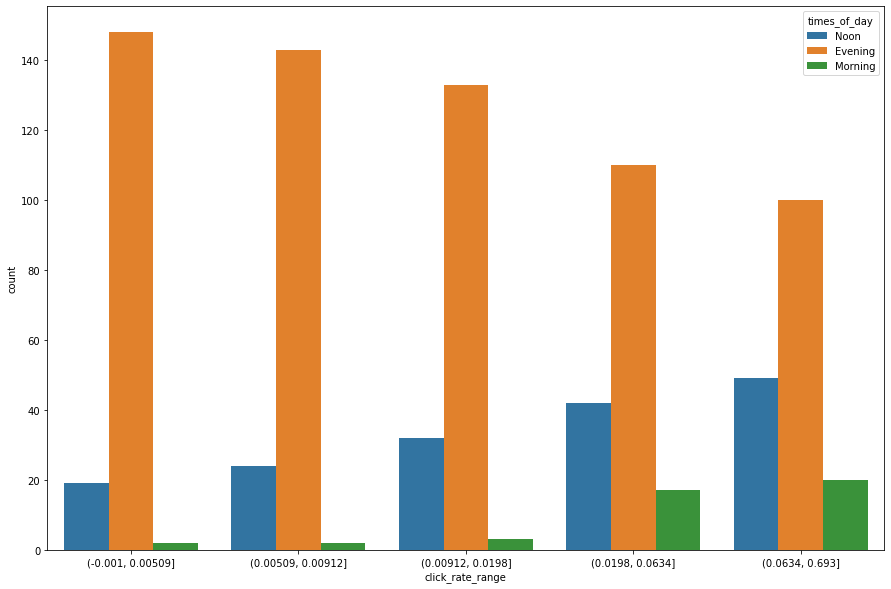

In [87]:
plt.figure(figsize=(15,10))
sns.countplot(x=train_df['click_rate_range'],hue=train_df['times_of_day'])

<AxesSubplot:xlabel='click_rate_range', ylabel='count'>

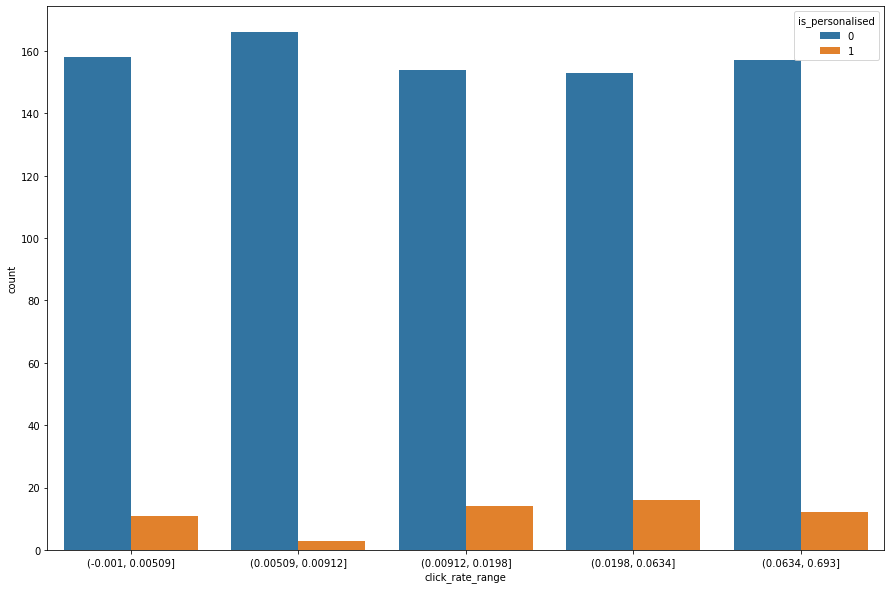

In [88]:
plt.figure(figsize=(15,10))
sns.countplot(x=train_df['click_rate_range'],hue=train_df['is_personalised'])

<AxesSubplot:xlabel='click_rate_range', ylabel='count'>

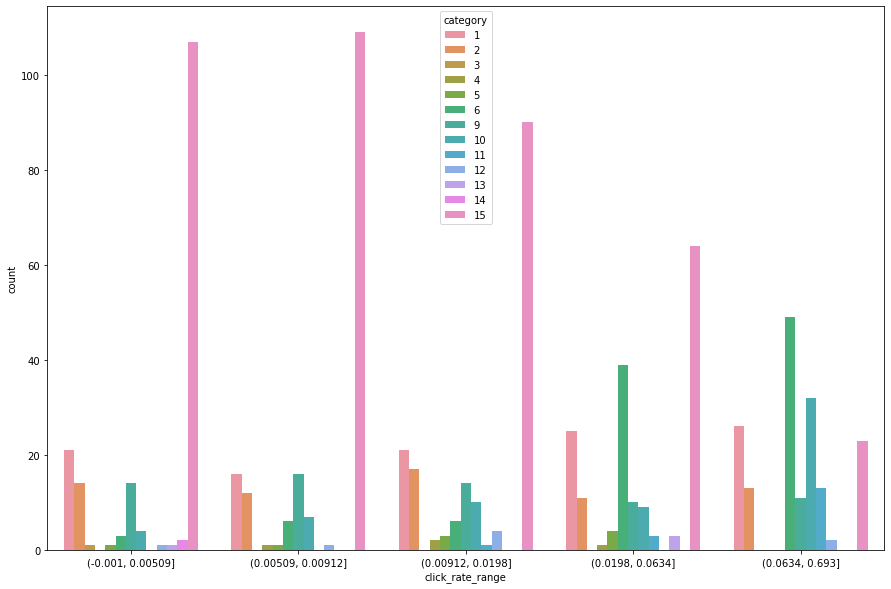

In [89]:
plt.figure(figsize=(15,10))
sns.countplot(x=train_df['click_rate_range'],hue=train_df['category'])

<AxesSubplot:xlabel='click_rate_range', ylabel='count'>

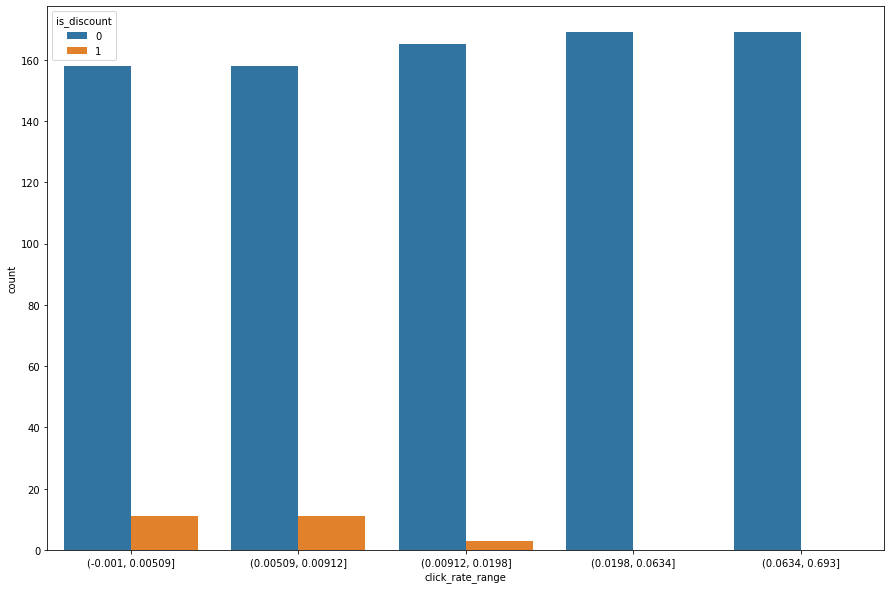

In [90]:
plt.figure(figsize=(15,10))
sns.countplot(x=train_df['click_rate_range'],hue=train_df['is_discount'])

<AxesSubplot:xlabel='click_rate_range', ylabel='count'>

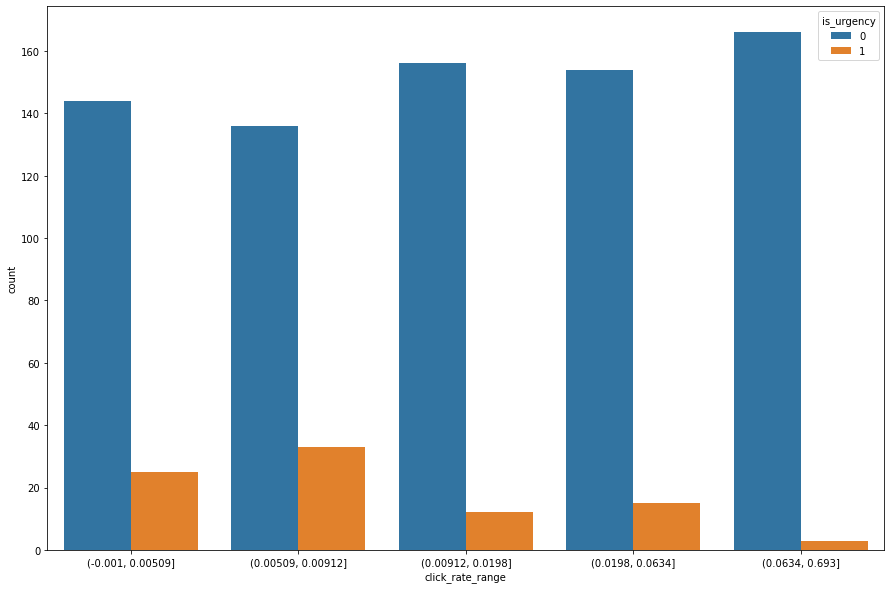

In [91]:
plt.figure(figsize=(15,10))
sns.countplot(x=train_df['click_rate_range'],hue=train_df['is_urgency'])

<AxesSubplot:xlabel='click_rate_range', ylabel='count'>

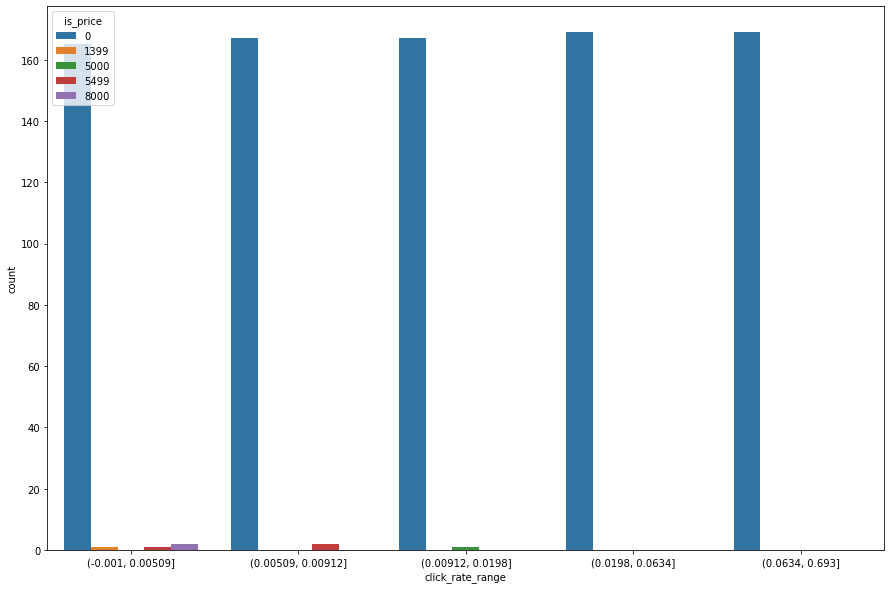

In [92]:
plt.figure(figsize=(15,10))
sns.countplot(x=train_df['click_rate_range'],hue=train_df['is_price'])

<AxesSubplot:xlabel='click_rate_range', ylabel='count'>

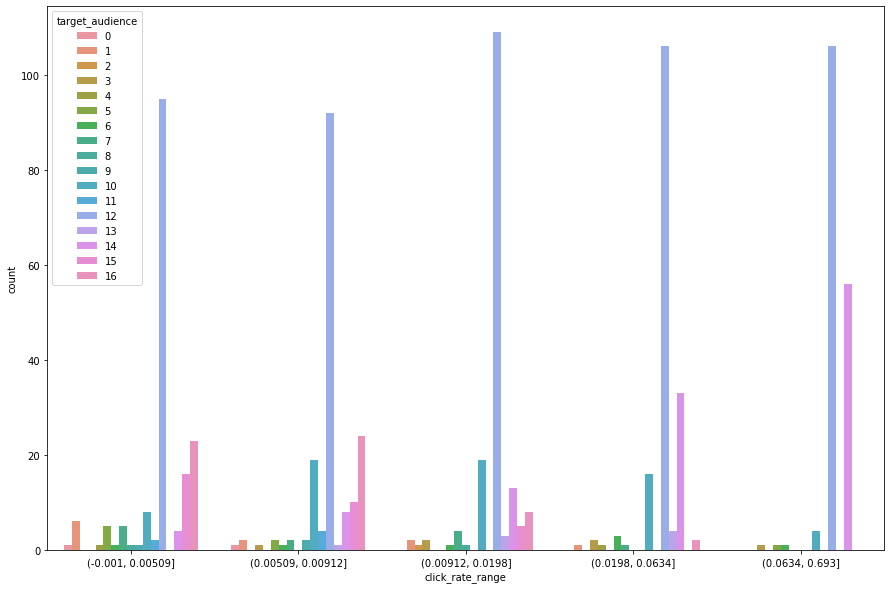

In [93]:
plt.figure(figsize=(15,10))
sns.countplot(x=train_df['click_rate_range'],hue=train_df['target_audience'])

In [94]:
train_df

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate,click_rate_range
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,14,0.103079,"(0.0634, 0.693]"
2,3,3,59,12801,16,5,1,Noon,2,11,...,0,1,0,0,0,0,0,16,0.002769,"(-0.001, 0.00509]"
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,10,0.010868,"(0.00912, 0.0198]"
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,1,0,0,0,0,0,14,0.142826,"(0.0634, 0.693]"
7,8,3,60,12117,17,4,0,Noon,6,26,...,0,1,0,0,0,0,0,14,0.166998,"(0.0634, 0.693]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1874,1875,3,74,10596,31,5,1,Noon,2,11,...,0,1,0,0,0,0,0,16,0.006033,"(0.00509, 0.00912]"
1876,1877,3,100,9132,19,4,0,Evening,15,9,...,0,0,0,0,0,0,0,15,0.006598,"(0.00509, 0.00912]"
1879,1880,3,74,10601,31,4,0,Evening,2,11,...,0,1,0,0,0,0,0,16,0.004249,"(-0.001, 0.00509]"
1885,1886,3,89,11050,26,1,0,Evening,15,9,...,0,0,0,0,0,0,0,6,0.008289,"(0.00509, 0.00912]"


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='campaign_id', ylabel='Density'>

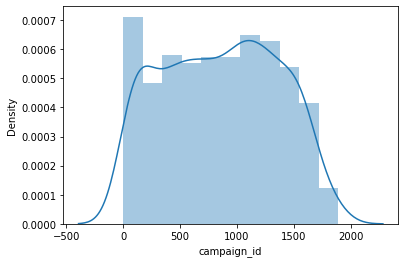

In [95]:
sns.distplot(train_df['campaign_id'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sender', ylabel='Density'>

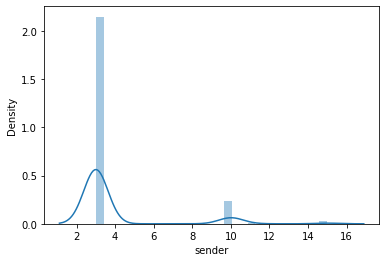

In [96]:
sns.distplot(train_df['sender'])

In [97]:
train_df['sender']=np.log(train_df['sender'])


C:\Users\himanshu\AppData\Local\Temp\ipykernel_27852\1299991553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['sender']=np.log(train_df['sender'])


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sender', ylabel='Density'>

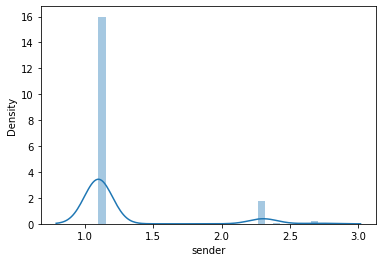

In [98]:
sns.distplot(train_df['sender'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='body_len', ylabel='Density'>

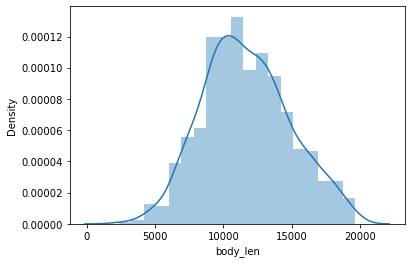

In [99]:
sns.distplot(train_df['body_len'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mean_paragraph_len', ylabel='Density'>

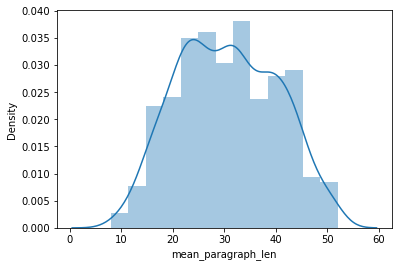

In [100]:
sns.distplot(train_df['mean_paragraph_len'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='day_of_week', ylabel='Density'>

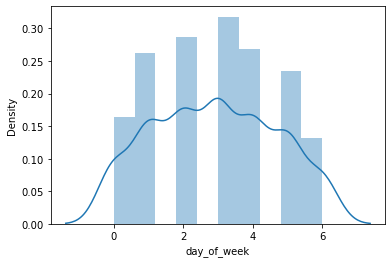

In [101]:
sns.distplot(train_df['day_of_week'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='is_weekend', ylabel='Density'>

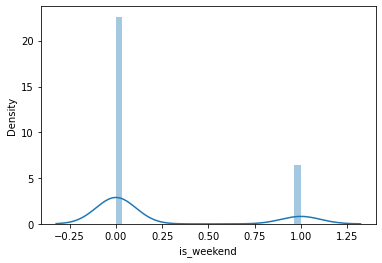

In [102]:
sns.distplot(train_df['is_weekend'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='product', ylabel='Density'>

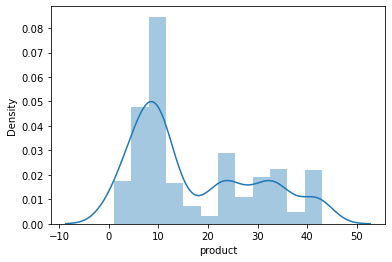

In [103]:
sns.distplot(train_df['product'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='category', ylabel='Density'>

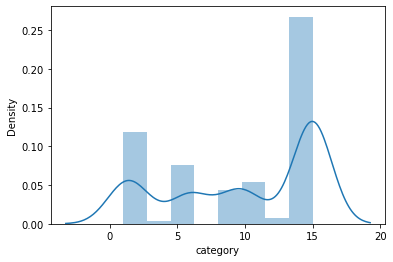

In [104]:
sns.distplot(train_df['category'])

In [105]:
le=LabelEncoder()


In [106]:
train_df['times_of_day']=le.fit_transform(train_df['times_of_day'])


C:\Users\himanshu\AppData\Local\Temp\ipykernel_27852\2342448918.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['times_of_day']=le.fit_transform(train_df['times_of_day'])


In [107]:
train_df.drop('click_rate_range',axis=1,inplace=True)

C:\Users\himanshu\AppData\Local\Temp\ipykernel_27852\1280556570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop('click_rate_range',axis=1,inplace=True)


<AxesSubplot:>

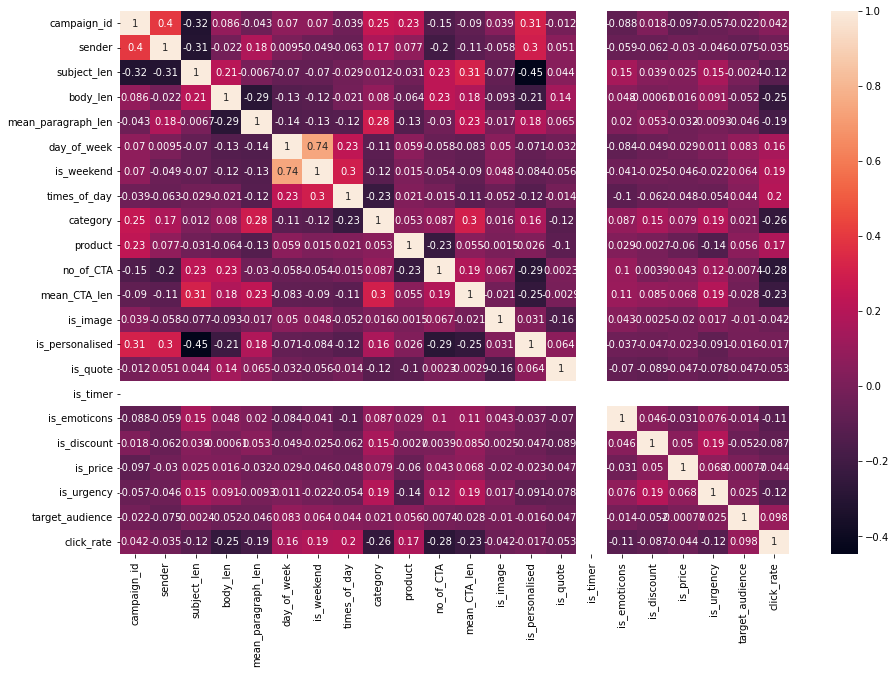

In [108]:
plt.figure(figsize=(15,10))
sns.heatmap(train_df.corr(),annot=True)


In [109]:
y=train_df['click_rate']

In [110]:
X=train_df.drop(['click_rate','day_of_week','campaign_id'],axis=1)

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [112]:
X_test.shape

(169, 19)

In [113]:
y_test.shape

(169,)

In [114]:
X_train.shape

(675, 19)

In [115]:
rfr=RandomForestRegressor()


In [116]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [117]:
y_pred=rfr.predict(X_test)


In [118]:
r2_score(y_test,y_pred)

0.6021106269899423

In [119]:
mean_squared_error(y_test,y_pred)

0.0033584990976443805